In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ladoing data
df = pd.read_csv('C:/Users/tthan/OneDrive/Desktop/Projects/hulu.csv')
print(df.head())

                 title   type                     genres  releaseYear  \
0                Ariel  movie     Comedy, Crime, Romance       1988.0   
1  Shadows in Paradise  movie       Comedy, Drama, Music       1986.0   
2         Forrest Gump  movie             Drama, Romance       1994.0   
3    The Fifth Element  movie  Action, Adventure, Sci-Fi       1997.0   
4   My Life Without Me  movie             Drama, Romance       2003.0   

      imdbId  imdbAverageRating  imdbNumVotes availableCountries  
0  tt0094675                7.4        8776.0                 JP  
1  tt0092149                7.5        7538.0                 JP  
2  tt0109830                8.8     2320505.0                 JP  
3  tt0119116                7.6      517631.0                 JP  
4  tt0314412                7.4       26044.0                 JP  


# How many titles are there in the dataset?

In [16]:
total_titles = len(df)
print(f"Total # of movies: {total_titles}")

Total # of movies: 9845


# Which top 5 movies / tv were released in 1993?

In [15]:
top_5 = df[df['releaseYear'] == 1993].sort_values(by='imdbAverageRating', ascending=False).head(5)
print(top_5[['title', 'releaseYear', 'imdbAverageRating']])

                      title  releaseYear  imdbAverageRating
6633              Slam Dunk       1993.0                8.7
6121            The X-Files       1993.0                8.6
59            Jurassic Park       1993.0                8.2
6112                Frasier       1993.0                8.2
423   Farewell My Concubine       1993.0                8.1


# What is the average IMDb rating of all titles in the dataset?

In [18]:
average_rating = df['imdbAverageRating'].mean()
print(f"Average IMDb Rating: {average_rating:.2f}")

Average IMDb Rating: 6.56


# How many titles belong to the genre "Drama"?

In [19]:
drama_titles = df[df['genres'].str.contains('Drama', na=False)].shape[0]
print(f"Number of Drama titles: {drama_titles}")

Number of Drama titles: 4356


# Which movie has the highest IMDb rating?

In [21]:
highest_rated_title = df.loc[df['imdbAverageRating'].idxmax()]
print(f"Highest rated movie: {highest_rated_title['title']} with a rating of {highest_rated_title['imdbAverageRating']}")

Highest rated movie: Kataomoi with a rating of 9.5


# Create a histogram to show the distribution of IMDb ratings.

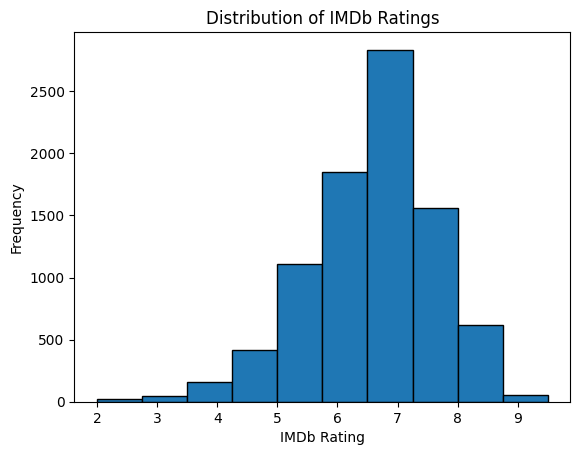

In [23]:
plt.hist(df['imdbAverageRating'], bins = 10, edgecolor='black')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

# What is the average IMDb rating for each genre?

In [26]:
df['genres_split'] = df['genres'].str.split(', ')
genres_explode = df.explode('genres_split')
average_rating_per_genre = genres_explode.groupby('genres_split')['imdbAverageRating'].mean()
print(average_rating_per_genre)

genres_split
Action                6.505933
Action & Adventure         NaN
Adventure             6.719953
Animation             6.923052
Biography             7.002069
Comedy                6.607822
Crime                 6.651647
Documentary           7.082908
Drama                 6.703758
Family                6.419209
Fantasy               6.441940
Game-Show             6.326667
History               6.911111
Horror                5.713223
Kids                  7.950000
Music                 6.768444
Musical               6.475676
Mystery               6.422563
News                  6.918182
Reality               6.000000
Reality-TV            6.519414
Romance               6.537425
Sci-Fi                6.183857
Sci-Fi & Fantasy           NaN
Science Fiction       5.500000
Short                 6.430952
Soap                       NaN
Sport                 6.856250
TV Movie                   NaN
Talk-Show             7.281818
Thriller              6.006279
War                   6.80

# Find movies that have an IMDb rating above 8 and more than 500,000 votes.


In [31]:
high_rated_popular_titles = df[(df['imdbAverageRating'] > 8) & (df['imdbNumVotes'] > 500000)]
print(high_rated_popular_titles[['title', 'imdbAverageRating', 'imdbNumVotes']])

                                                  title  imdbAverageRating  \
2                                          Forrest Gump                8.8   
5     Pirates of the Caribbean: The Curse of the Bla...                8.1   
8                                   Million Dollar Baby                8.1   
10                                              Memento                8.4   
11                                         Blade Runner                8.1   
...                                                 ...                ...   
6079                                       Prison Break                8.3   
6081                                         The Office                9.0   
6144                                               Lost                8.3   
6306                                           Sherlock                9.1   
7094                                     Rick and Morty                9.1   

      imdbNumVotes  
2        2320505.0  
5        1238597.0  


# Create a bar chart showing the number of movies released each year.

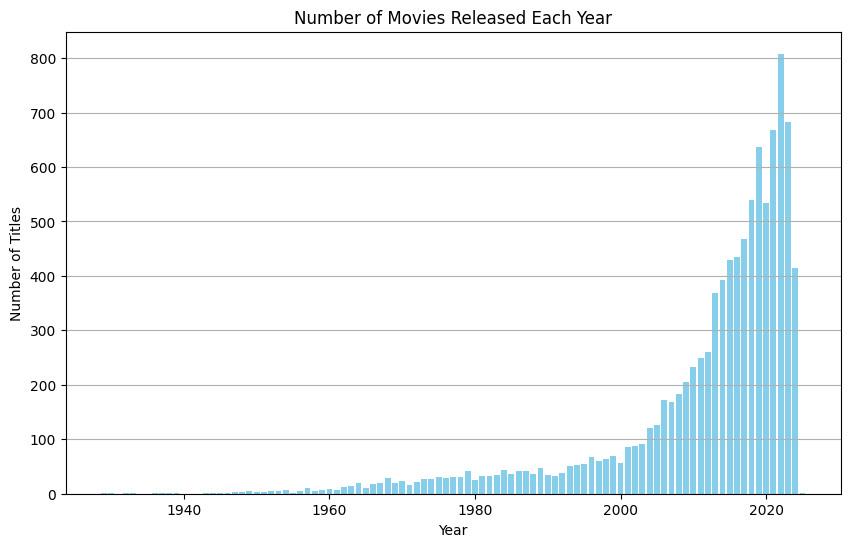

In [37]:
titles_per_year = df['releaseYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(titles_per_year.index, titles_per_year.values, color ='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies Released Each Year')
plt.grid(axis='y')
plt.show()

# Create a new column called "RatingCategory" that classifies movies as "Excellent" (rating > 8), "Good" (rating between 6 and 8), or "Average" (rating < 6).

In [41]:
def categorize_rating(rating):
    if rating > 8:
        return 'Excellent'
    elif 6 <= rating <= 8:
        return 'Good'
    else:
        return 'Average'

df['RatingCategory'] = df['imdbAverageRating'].apply(categorize_rating)
print(df[['title', 'imdbAverageRating', 'RatingCategory']].head())

                 title  imdbAverageRating RatingCategory
0                Ariel                7.4           Good
1  Shadows in Paradise                7.5           Good
2         Forrest Gump                8.8      Excellent
3    The Fifth Element                7.6           Good
4   My Life Without Me                7.4           Good
